In [1]:
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
import pickle
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_glass_brain, plot_stat_map
import matplotlib.pyplot as plt

/work/neuro_4/neuro_env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
# loading the objects:
f = open('../data/PvsN_searchlight.pkl', 'rb')
searchlight, searchlight.scores_ = pickle.load(f)
f.close()

mask_wb_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)

In [3]:
#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)


#plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.5,
#                          title='negative vs button (unthresholded)',
#                          plot_abs=False)
#
#fig=plotting.plot_glass_brain(searchlight_img,cmap='prism',colorbar=True,threshold=0.60,title='negative vs button (Acc>0.6')
#fig.savefig("../plots/what.png", dpi=300)
##plt.show()
#
#plot_stat_map(searchlight_img, cmap='jet',threshold=0.6, cut_coords=[-30,-20,-10,0,10,20,30],
#              display_mode='z',  black_bg=False,
#              title='pos vs neg (Acc>0.6)')
#plt.show()

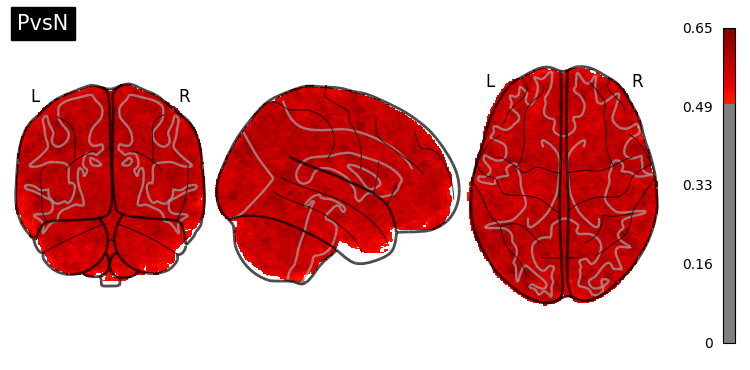

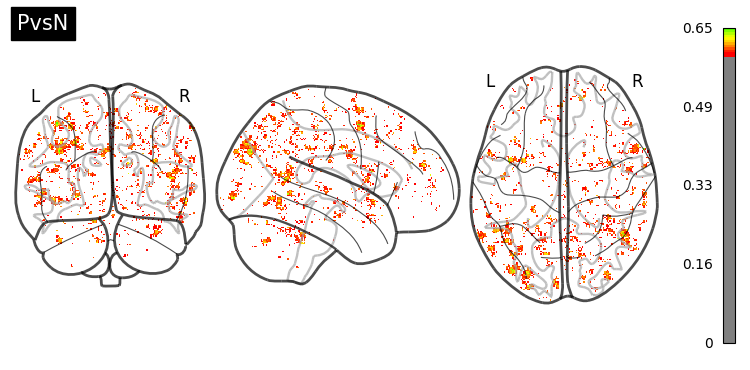

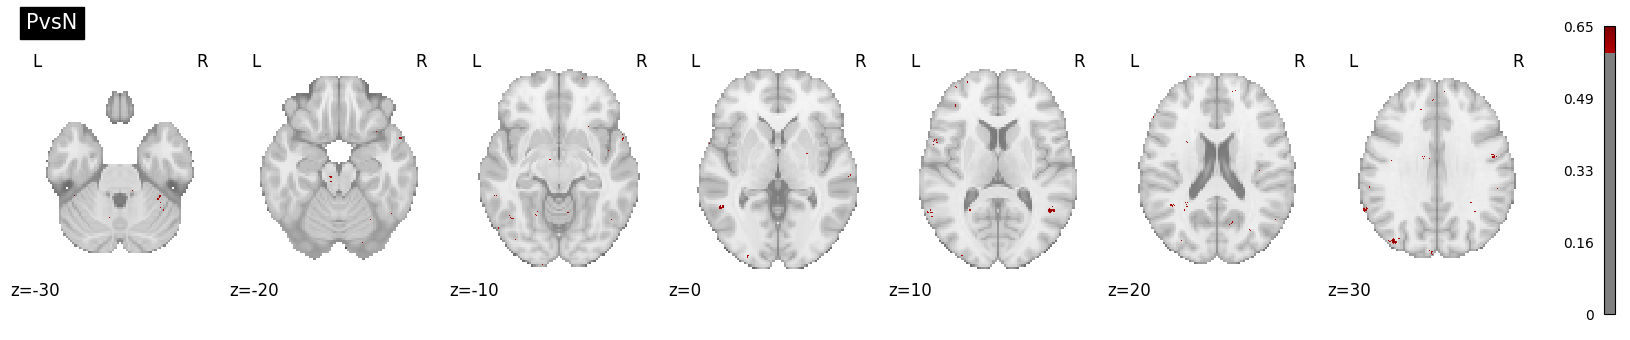

In [4]:


# Plot 1: Glass brain with 'jet' colormap
display1 = plot_glass_brain(searchlight_img, cmap='jet', colorbar=True, threshold=0.5,
                            title='PvsN',
                            plot_abs=False)
display1.savefig("../plots/PvsN_glass_brain_jet.png", dpi=300)

# Plot 2: Glass brain with 'prism' colormap
display2 = plot_glass_brain(searchlight_img, cmap='prism', colorbar=True, threshold=0.60,
                            title='PvsN')
display2.savefig("../plots/PvsN_glass_brain_prism.png", dpi=300)

# Plot 3: Statistical map
display3 = plot_stat_map(searchlight_img, cmap='jet', threshold=0.6, cut_coords=[-30,-20,-10,0,10,20,30],
                         display_mode='z', black_bg=False,
                         title='PvsN')
display3.savefig("../plots/PvsN_stat_map.png", dpi=300)
